# Project: TMDB Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#assessment">Data Gathering & Assessing</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>

</ul>

<a id='intro'></a>
## Introduction

> **Dataset**: IMDB Kaggle Dataset was selected for analysis. This dataset should help answer some interesting questions about movies. For each movie (row) in the dataset we have 21 features (columns) to describe it; such as Budget, Revenue, User Ratings, and other features.

**Initially** the questions be asked were the following:

1) What is the relationship between Movie Budgets and the amount of Revenue they generate?

2) Does a higher budget translate into higher revenues?

3) What is the relationship between a movie's Budget and its Popularity?

4) What is the relationship between a movie's Runtime and Vote Average? Do longer movies receive lower ratings?



**However**, after realizing that data on Budget and Revenues is missing, a new set of questions was formulated. Data for missing Revenue and Budget are marked as 0.0 rather than NaN, and did not show up in early data inspection when running df.isnan() or df.info(). More than 50% of the data was 0.0 when running df.describe() which drew attention to the missing values. We can replace the missing data with the mean, but that wouldn't lead to an accurate analysis. Instead, a new set of questions is posed.

**New Set of Questions**:

1) What is the relationship between a movie's Runtime and Vote Average? Do longer movies receive lower ratings?

2) Which movies were the most profitable?

3) Which movies earned the most amount of revenue?

4) Which year did we have the highest number of profitable movies?

6) What is the average runtime of all movies? And how much is it for wildly successful movies?

7) Who were the most frequently cast actors across all movies?

In [1]:
# Packages used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='assessment'></a>
## Data Gathering & Assessing

In [3]:
# Load data and print out a few lines for inspection.
# Looking for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')

df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe() # We use this to gain some insight into the dataset's descriptive statistics

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='cleaning'></a>
## Data Cleaning
#### Task Definition
#### Steps that need to be taken in order to inspect and clean the dataset

**First**: Copy the DataFrame with only the columns we will be using to make it easier to work with the dataset.

**Second**: Inspect the data for missing values and we also drop duplicates.

**Third**: Discard movie entries that have missing data on Revenue and Budget. Otherwise, we find that none of the columns chosen for the questions above have missing values.

**Fourth**: Replace 0 with NaN in Runtime column.

**Fifth**: Convert Release Year Column to Date-Time format using Pandas.

Then we can begin exploring the data.

> ### **Taking only the columns we want below**

In [5]:
# After inspecting the data for missing values
# We copy the dataframe with only the columns we will be using, to make it easier to work with the dataset
df = df[['original_title','budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'cast', 'release_date', 'release_year']].copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10866 non-null  object 
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   runtime         10866 non-null  int64  
 4   popularity      10866 non-null  float64
 5   vote_average    10866 non-null  float64
 6   cast            10790 non-null  object 
 7   release_date    10866 non-null  object 
 8   release_year    10866 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 764.1+ KB


> ### **In checking for duplicates we find one duplicate entry only, and we drop it below.**

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
rows, cols = df.shape

print('After dropping duplicates we have a total of {} movie entries and {} columns (features).'.format(rows, cols))

After dropping duplicates we have a total of 10865 movie entries and 9 columns (features).


> ### **Drop all rows with value 0 for Budget and Revenue Columns**

In [9]:
df[['budget', 'revenue']] = df[['budget', 'revenue']].replace(0, np.nan)
df.dropna(subset=['budget','revenue'], inplace=True)

# We then test to make sure they were in fact dropped
(df[['budget','revenue']] == 0.0).sum()

budget     0
revenue    0
dtype: int64

> ### **Replace 0 with NaN in Runtime Column**

In [10]:
df[['runtime']] = df[['runtime']].replace(0, np.nan)
df.dropna(subset=['runtime'], inplace=True)

rows, cols = df.shape

print('After dropping rows with missing values we have a total of {} movie entries and {} columns (features).'.format(rows, cols))

After dropping rows with missing values we have a total of 3854 movie entries and 9 columns (features).


> ### **Convert Release Year column values to Date-Time format**

In [11]:
df.release_date = pd.to_datetime(df['release_date'])
print(df.dtypes)
df.head()

original_title            object
budget                   float64
revenue                  float64
runtime                    int64
popularity               float64
vote_average             float64
cast                      object
release_date      datetime64[ns]
release_year               int64
dtype: object


,original_title,budget,revenue,runtime,popularity,vote_average,cast,release_date,release_year
0,Jurassic World,150000000.0,1.513529e+09,124,32.985763,6.5,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015-06-09,2015
1,Mad Max: Fury Road,150000000.0,3.784364e+08,120,28.419936,7.1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,2015-05-13,2015
2,Insurgent,110000000.0,2.952382e+08,119,13.112507,6.3,Shailene Woodley|Theo James|Kate Winslet|Ansel...,2015-03-18,2015
3,Star Wars: The Force Awakens,200000000.0,2.068178e+09,136,11.173104,7.5,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2015-12-15,2015
4,Furious 7,190000000.0,1.506249e+09,137,9.335014,7.3,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,2015-04-01,2015


> ### **Convert Data Type of Budget and Revenue columns from floats to integers**

In [12]:
df[['budget', 'revenue']] = df[['budget', 'revenue']].astype(int)

In [13]:
df.dtypes

original_title            object
budget                     int32
revenue                    int32
runtime                    int64
popularity               float64
vote_average             float64
cast                      object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### What is the relationship between Vote Average and Runtime?
To answer this question we will draw a Scatterplot to visualize the relationship between Vote Average and Runtime

For our purposes, the few movies over 200 minutes of runtime seem to be outliers, and we will remove them by running a query on our DataFrame.

In the next cell, we will visualize each column in the new DataFrame to get a high level idea on the distribution before we start answering questions about the dataset.

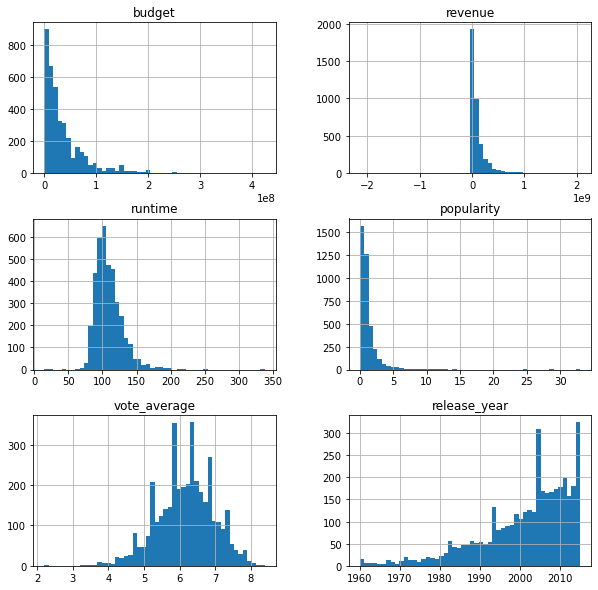

In [14]:
df.hist(figsize=(10,10), bins=50);

In [15]:
yticks = np.arange(40)
xticks = [0, 1e1, 1e2, 1e3, 1e4, 1e5]

df2 = df.query('runtime < 200') # Keep all rows where runtime is <200.

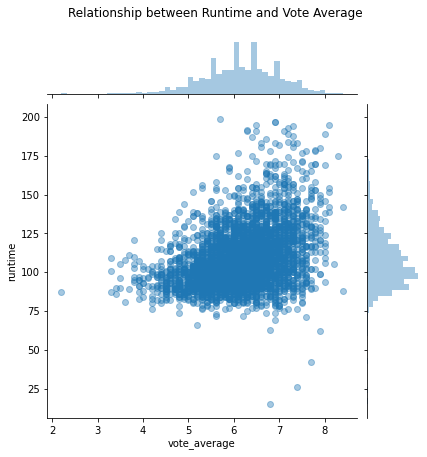

In [16]:
joint_plot = sns.jointplot(data = df2, x = "vote_average", y = "runtime", kind = "scatter", alpha=0.4, height=6)
joint_plot.fig.suptitle('Relationship between Runtime and Vote Average', y=1.05);

The plot above shows the relationship between Runtime and Vote Average. We will plot it below in a different format to view.

It will be interesting to see what the average runtime is for all movies, and what the average runtime is for ones that are wildly successful.

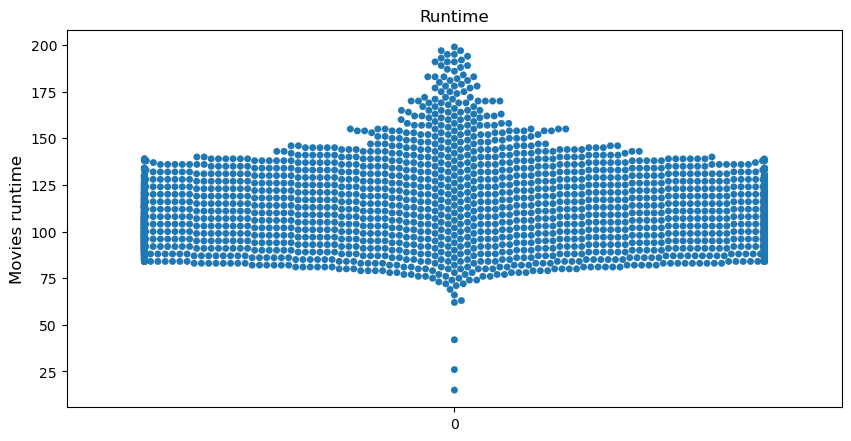

In [17]:
plt.figure(figsize=(10,5), dpi = 100)
sns.swarmplot(data=df2['runtime'])

plt.title('Runtime')
plt.ylabel('Movies runtime', fontsize=12)
plt.show()

We can see that most runtimes are between 75 and 130 minutes with some outliers being too short or too long.

### What is the Average Runtime? Calculating this without removing any outliers

In [18]:
average_runtime = df['runtime'].mean()
'The average Runtime is {} minutes'.format(average_runtime)

'The average Runtime is 109.22029060716139 minutes'

### Which 5 movies were the most profitable?

We insert a Column called 'profit' whose values are generated by deducting budget from revenue for each entry.

In [19]:
df.insert(loc=3, column='profit', value=df['revenue']-df['budget'])
df.head(5)

,original_title,budget,revenue,profit,runtime,popularity,vote_average,cast,release_date,release_year
0,Jurassic World,150000000,1513528810,1363528810,124,32.985763,6.5,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015-06-09,2015
1,Mad Max: Fury Road,150000000,378436354,228436354,120,28.419936,7.1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,2015-05-13,2015
2,Insurgent,110000000,295238201,185238201,119,13.112507,6.3,Shailene Woodley|Theo James|Kate Winslet|Ansel...,2015-03-18,2015
3,Star Wars: The Force Awakens,200000000,2068178225,1868178225,136,11.173104,7.5,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2015-12-15,2015
4,Furious 7,190000000,1506249360,1316249360,137,9.335014,7.3,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,2015-04-01,2015


In [20]:
#The function below makes use of pandas nlargest to derive the largest 5 values in the provided column.
def calc_largest(string):
    result = df.nlargest(5, string, keep='all')
    return result

calc_largest('profit')

,original_title,budget,revenue,profit,runtime,popularity,vote_average,cast,release_date,release_year
1386,Avatar,237000000,-2147483648,1910483648,162,9.432768,7.1,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,2009-12-10,2009
3,Star Wars: The Force Awakens,200000000,2068178225,1868178225,136,11.173104,7.5,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2015-12-15,2015
5231,Titanic,200000000,1845034188,1645034188,194,4.355219,7.3,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,1997-11-18,1997
0,Jurassic World,150000000,1513528810,1363528810,124,32.985763,6.5,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015-06-09,2015
4,Furious 7,190000000,1506249360,1316249360,137,9.335014,7.3,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,2015-04-01,2015


In [21]:
#What is the average runtime of the top 100 profitable movies?
df.nlargest(100,'profit', keep='all')['runtime'].mean()

129.83

### Which 5 movies were the least profitable?

In [22]:
df.nsmallest(5,'profit', keep='all')

,original_title,budget,revenue,profit,runtime,popularity,vote_average,cast,release_date,release_year
2244,The Warrior's Way,425000000,11087569,-413912431,100,0.250540,6.4,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,2010-12-02,2010
5508,The Lone Ranger,255000000,89289910,-165710090,149,1.214510,6.0,Johnny Depp|Armie Hammer|William Fichtner|Hele...,2013-07-03,2013
7031,The Alamo,145000000,25819961,-119180039,137,0.948560,5.9,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,2004-04-07,2004
3484,Mars Needs Moms,150000000,38992758,-111007242,88,0.921653,5.5,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,2011-03-09,2011
4970,Brother Bear,100000000,250,-99999750,85,1.653031,6.8,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,2003-10-20,2003


### Which 5 movies earned the highest amount of revenue?

In [23]:
df.nlargest(5,'revenue', keep='all')

,original_title,budget,revenue,profit,runtime,popularity,vote_average,cast,release_date,release_year
3,Star Wars: The Force Awakens,200000000,2068178225,1868178225,136,11.173104,7.5,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2015-12-15,2015
5231,Titanic,200000000,1845034188,1645034188,194,4.355219,7.3,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,1997-11-18,1997
4361,The Avengers,220000000,1519557910,1299557910,143,7.637767,7.3,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,2012-04-25,2012
0,Jurassic World,150000000,1513528810,1363528810,124,32.985763,6.5,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015-06-09,2015
4,Furious 7,190000000,1506249360,1316249360,137,9.335014,7.3,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,2015-04-01,2015


### Which 5 movies earned the least amount of revenue?

In [24]:
df.nsmallest(5,'revenue', keep='all')

,original_title,budget,revenue,profit,runtime,popularity,vote_average,cast,release_date,release_year
1386,Avatar,237000000,-2147483648,1910483648,162,9.432768,7.1,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,2009-12-10,2009
5067,Shattered Glass,6000000,2,-5999998,94,0.462609,6.4,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,2003-11-14,2003
8142,Mallrats,6000000,2,-5999998,94,0.552091,6.8,Jason Lee|Jeremy London|Shannen Doherty|Claire...,1995-10-20,1995
3239,Dr. Horrible's Sing-Along Blog,200000,3,-199997,42,0.352054,7.7,Neil Patrick Harris|Nathan Fillion|Felicia Day...,2008-07-15,2008
5162,Kid's Story,10,5,-5,15,0.208637,6.8,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,2003-06-02,2003
8523,Bordello of Blood,15000000,5,-14999995,87,0.578849,4.9,Dennis Miller|Erika Eleniak|Angie Everhart|Joh...,1996-08-16,1996


### In which years did we have the highest and lowest number of profitable movies?

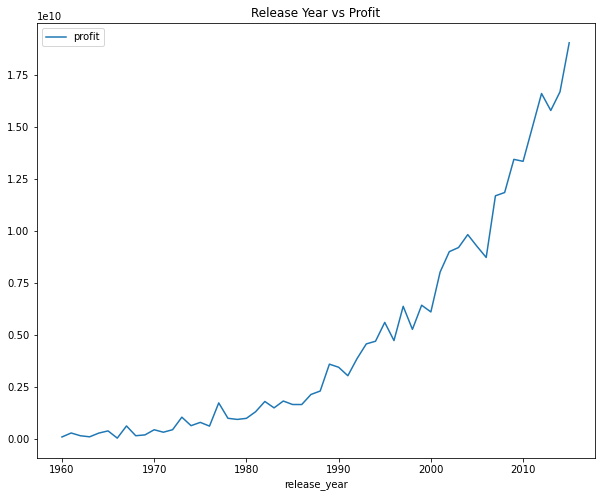

In [25]:
year_profit = df.groupby('release_year')['profit'].sum()
year_profit.plot(title = "Release Year vs Profit", figsize=(10,8))
plt.legend()

In [26]:
year_max = year_profit.idxmax()

print("The year with most profits is {}".format(year_max))

year_min = year_profit.idxmin()

print("The year with least profits is {}".format(year_min))

The year with most profits is 2015
The year with least profits is 1966


### Who were the most frequently cast actors across all movies?

In [27]:
actors_all = df['cast'].str.strip().str.split('|')


#In the following for-loop, NaNs are interpreted as float. 
#In order for it to work, we replace all NaN values with the string "missing"
actors_all = actors_all.fillna("missing")

#The for-loop below unpacks multiple values in each movie cast into one flat list
flat_list = []
for item in actors_all:
    for actor in item:
        flat_list.append(actor)

#Flat list is then converted to Pandas Series in order to run value_counts()
counts = pd.Series(flat_list).value_counts()

freq_cast = counts.iloc[0:10]

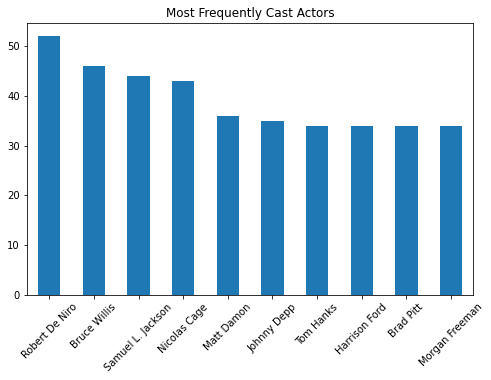

In [28]:
base_color = sns.color_palette()[0]
freq_cast.plot.bar(color=base_color, figsize=(8,5))
plt.xticks(rotation=45);
plt.title("Most Frequently Cast Actors");

### Popularity vs Budget

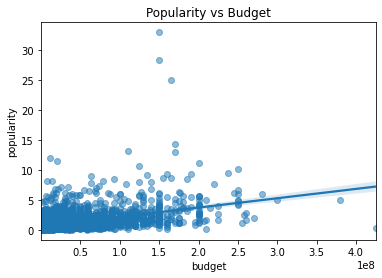

In [29]:
sns.regplot(x=df2.budget, y=df2.popularity, scatter_kws={'alpha': 0.5}).set_title("Popularity vs Budget",size=12);

The graph above plots the relationship between Popularity and Budget. Do higher budget movies yield more profits?

Unfortunately, since we have a lot of the values for budget missing, the plot above is somewhat skewed and unreliable.

<a id='conclusions'></a>
## Conclusions

The Average Runtime of all movies is 109.2 Minutes.

The Average Runtime of the top 100 profitable movies is 129.83

The Top 3 Most Profitable Movies were: Avatar, Star Wars: The Force Awakens, and Titanic.

The Top 3 Revenue Generating Movies were: Star Wars: The Force Awakens, Titanic, and The Avengers.

The Most Cast 5 Actors are: Robert De Niro, Bruce Willis, Samuel L Jackson, Nicolas Cage, and Matt Damon.

2015 is the year of highest profits for the entire dataset.

1966 is the year of least profits for entire dataset. Profits steadily increasing over time.



**Keep in mind:** Correlation != causation


<a id='limitations'></a>
## Limitations
We have some missing values in the dataset affecting our results.

We don't know the currency used in the dataset.

Data for Budget and Revnues have a lot of 0. Had to deal with them.

Duplicates in the data skew results.

Incorrect datatypes had to be fixed